In [41]:
import numpy as np
import pandas as pd


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
pd.set_option("display.max_rows", 200)


In [44]:
df= pd.read_csv("footballers_data.csv")

In [45]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,(PSV),Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


List of 10 players who scored the most in La Liga

In [80]:
df[df['League'] == 'La Liga'].groupby('Player Names').agg({'Goals': 'sum', 'Club': 'first'}).sort_values('Goals', ascending=False).head(10)


,Goals,Club
Player Names,,
Lionel Messi,135,(BAR)
Luis Suarez,95,(ATL)
Iago Aspas,80,(CEL)
Karim Benzema,57,(RMA)
Antoine Griezmann,53,(BAR)
Gerard Moreno,53,(VIL)
Cristiano Ronaldo,51,(JUV)
Mikel Oyarzabal,42,(SOC)
Cristhian Stuani,40,(GIR)


TOP AND LEAST GOAL SCORERS IN EACH LEAGUE

In [81]:
s2=df.sort_values(by="League")

league = input("Enter league ")

s3=s2[s2.League==league]

print("TOP GOAL SCORERS IN EACH LEAGUE")

print(s3.sort_values(by="Goals").tail(5)["Player Names"].unique())

print("LEAST GOALSCORERS IN EACH LEAGUE")

print(s3.sort_values(by="Goals").head(5)["Player Names"].unique())



TOP GOAL SCORERS IN EACH LEAGUE
[]
LEAST GOALSCORERS IN EACH LEAGUE
[]


List of players who played the most games

In [82]:
print(df.sort_values(by=['Matches_Played'], ascending=False)[["Player Names", "Matches_Played"]])

           Player Names  Matches_Played
212    Francesco Caputo              38
260    Luka Milivojevic              38
114       Gerard Moreno              38
120       Jose Callejon              38
206  Fabio Quagliarella              37
..                  ...             ...
359        Alex Telles                3
375       Andraz Sporar               3
490        Noni Madueke               3
537     Angel Rodriguez               3
361    Haris  Seferovic               2

[660 rows x 2 columns]


List of players who played more minutes

In [49]:
print(df.sort_values(by=['Mins'], ascending=False)[["Player Names", "Mins"]])

         Player Names  Mins
291       Diego Souza  4177
293        Nico Lupez  3931
260  Luka Milivojevic  3651
212  Francesco Caputo  3641
114     Gerard Moreno  3555
..                ...   ...
375     Andraz Sporar   356
361  Haris  Seferovic   337
572   Niclas Fullkrug   293
359      Alex Telles    280
552       Luis Muriel   264

[660 rows x 2 columns]


Obtain statistics for a specific player

In [84]:
player_name = input("Enter player name")
print(df[df["Player Names"]==player_name])

    Country                          League   Club Player Names  \
80   Brazil  Campeonato Brasileiro SÃ©rie A  (GRE)  Diego Souza   
173  Brazil  Campeonato Brasileiro SÃ©rie A  (GRE)  Diego Souza   
291  Brazil  Campeonato Brasileiro SÃ©rie A  (GRE)  Diego Souza   

     Matches_Played  Substitution   Mins  Goals     xG  xG Per Avg Match  \
80               34              0  2981     14  10.67              0.34   
173              26              1  1953     11  11.72              0.57   
291              32              0  4177     11  11.43              0.26   

     Shots  OnTarget  Shots Per Avg Match  On Target Per Avg Match  Year  
80      86        35                 2.74                     1.12  2016  
173     74        30                 3.60                     1.46  2017  
291     51        21                 1.16                     0.48  2018  


List of players with their statistics

In [51]:
#get list of players with their statistics
df_player_sum = df.groupby("Player Names").sum()[["Matches_Played", "Mins", "Goals", "Shots", "OnTarget"]]
df_player_sum.tail(10)



,Matches_Played,Mins,Goals,Shots,OnTarget
Player Names,,,,,
Willian Jose,79,6744,35,183,74
Wissam Ben,10,879,6,30,8
Wissam Ben Yedder,76,7031,47,184,95
Wout Weghorst,71,6732,39,183,86
Yago Pikachu,34,3192,10,77,37
Yeferson Soteldo,31,2883,9,68,26
Youssef En-Nesyri,5,465,4,14,4
Yussuf Poulsen,27,2556,15,65,27
Zlatan Ibrahimovic,64,6133,58,309,128


Number of Matches Played by League (Bar Chart)

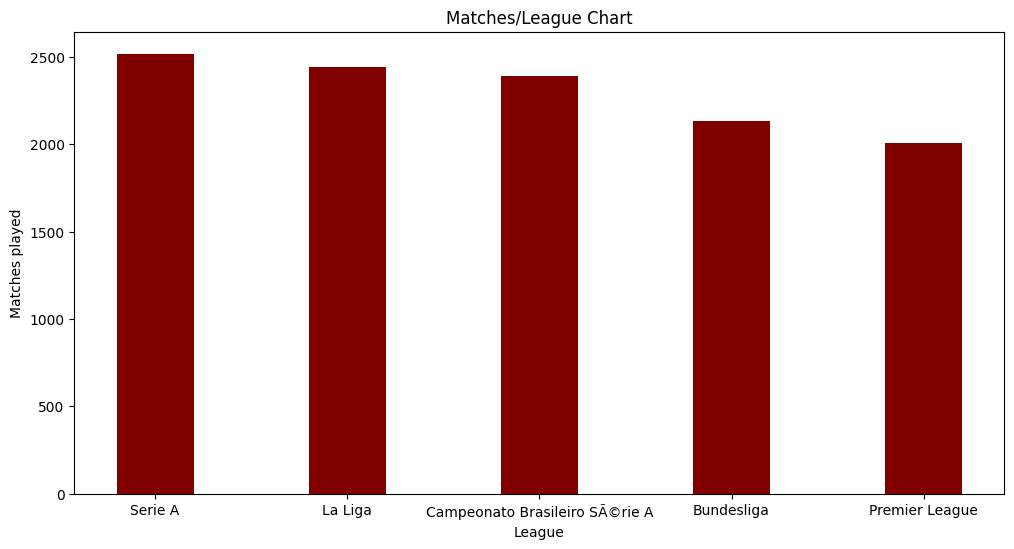

In [52]:
#get matches played by each league
matches_league = df.groupby('League')['Matches_Played'].sum().sort_values(ascending=False)

#get the top 5 leagues
label2 = list(matches_league.index.values)[:5]

fig = plt.figure(figsize = (12, 6))


plt.bar(label2, matches_league[:5], color ='maroon',
        width = 0.4)

plt.xlabel("League")
plt.ylabel("Matches played")
plt.title("Matches/League Chart")
plt.show()

Number of Matches Played by League (Line Plot)

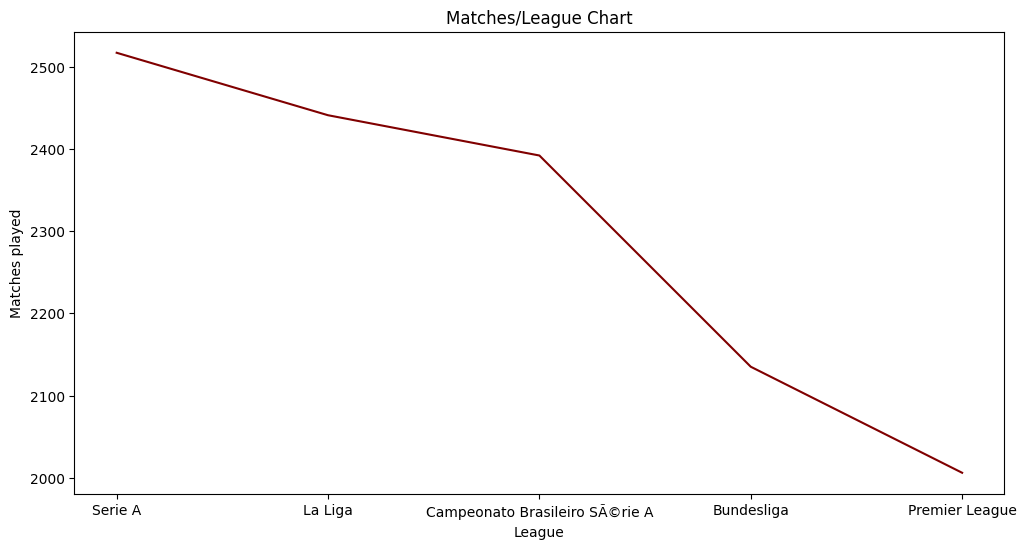

In [53]:
matches_league = df.groupby('League')['Matches_Played'].sum().sort_values(ascending=False)

label2 = list(matches_league.index.values)[:5]

fig = plt.figure(figsize = (12, 6))

plt.plot(label2, matches_league[:5], color ='maroon')

plt.xlabel("League")
plt.ylabel("Matches played")
plt.title("Matches/League Chart")
plt.show()

Total Goals Scored by League (Bar Chart)

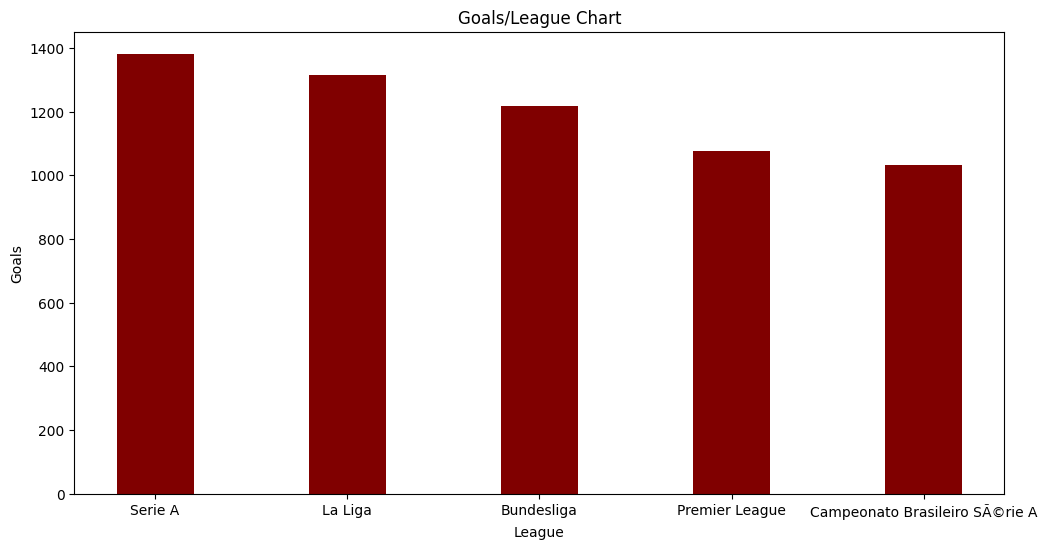

In [54]:
goals_league = df.groupby('League')['Goals'].sum().sort_values(ascending=False)

label2 = list(goals_league.index.values)[:5]

fig = plt.figure(figsize = (12, 6))

plt.bar(label2, goals_league[:5], color ='maroon',
        width = 0.4)

plt.xlabel("League")
plt.ylabel("Goals")
plt.title("Goals/League Chart")
plt.show()

Total Goals Scored by League (Line Plot)

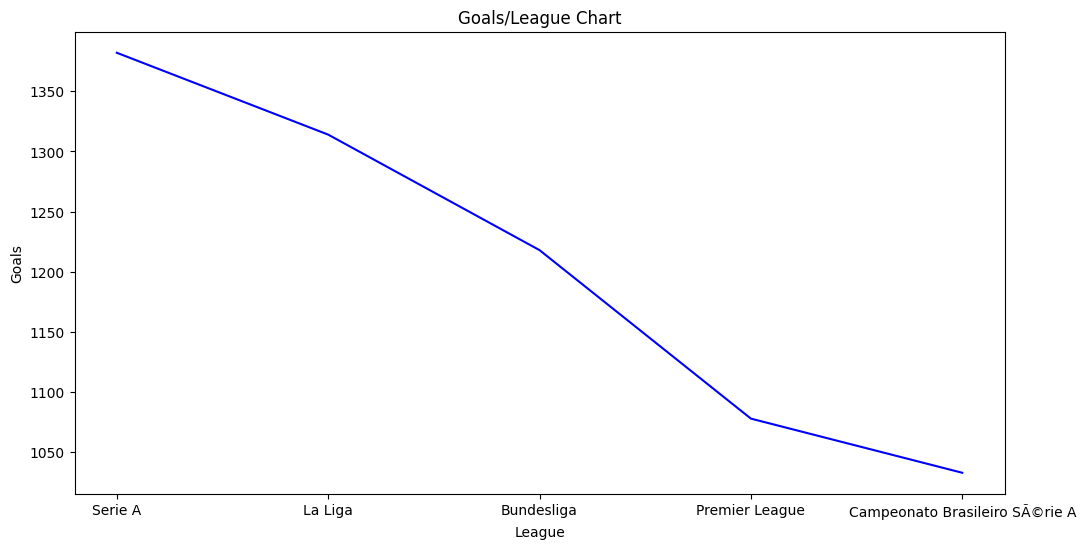

In [55]:
goals_league = df.groupby('League')['Goals'].sum().sort_values(ascending=False)

label2 = list(goals_league.index.values)[:5]

fig = plt.figure(figsize = (12, 6))

plt.plot(label2, goals_league[:5], color ='blue')

plt.xlabel("League")
plt.ylabel("Goals")
plt.title("Goals/League Chart")
plt.show()

Total Substitutions by League (Bar Chart)

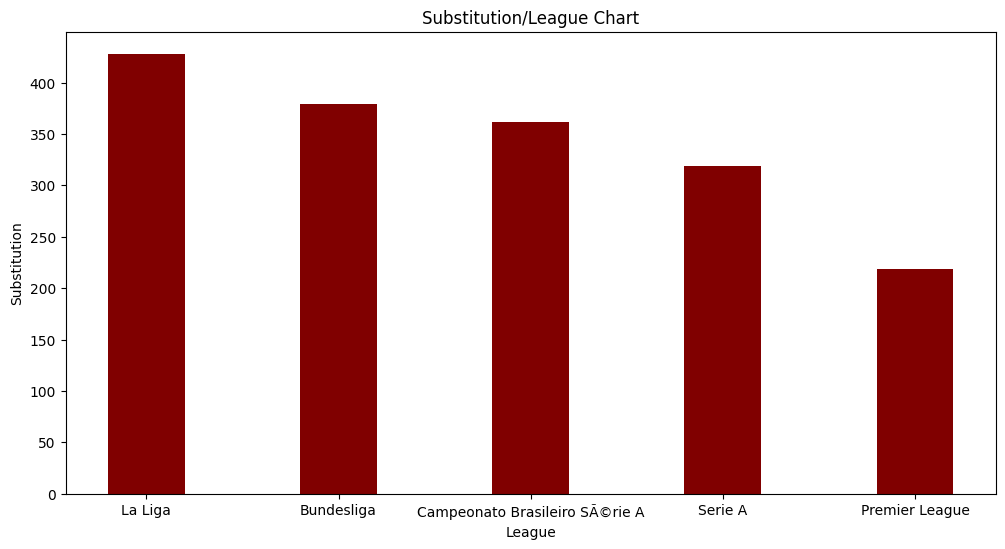

In [56]:
subs_league = df.groupby('League')['Substitution '].sum().sort_values(ascending=False)
label2 = list(subs_league.index.values)[:5]
fig = plt.figure(figsize = (12, 6))
plt.bar(label2, subs_league[:5], color ='maroon',
        width = 0.4)

plt.xlabel("League")
plt.ylabel("Substitution")
plt.title("Substitution/League Chart")
plt.show()

Total Substitutions by League (Line Plot)

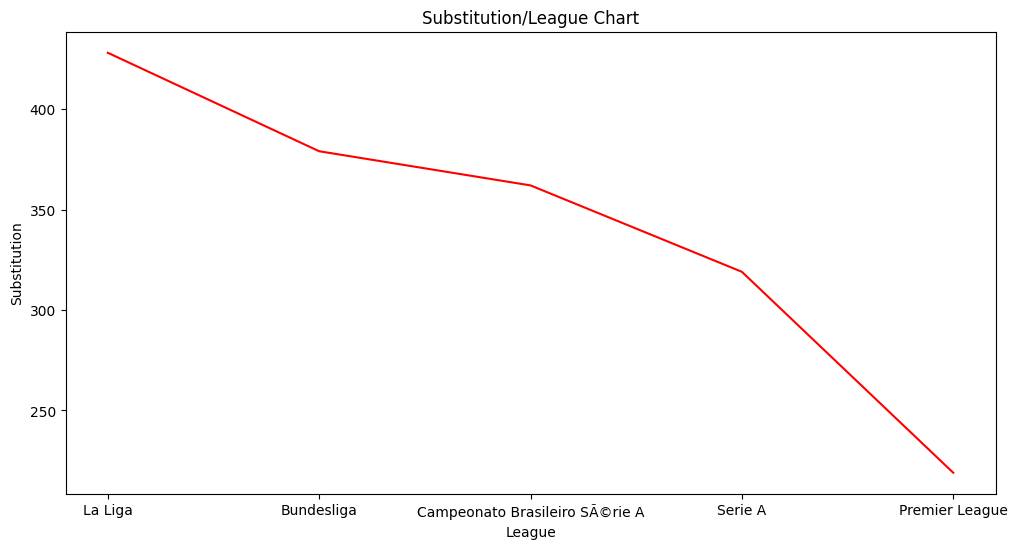

In [57]:
subs_league = df.groupby('League')['Substitution '].sum().sort_values(ascending=False)

label2 = list(subs_league.index.values)[:5]

fig = plt.figure(figsize = (12, 6))

# creating the bar plot
plt.plot(label2, subs_league[:5], color ='red')

plt.xlabel("League")
plt.ylabel("Substitution")
plt.title("Substitution/League Chart")
plt.show()